<a href="https://colab.research.google.com/github/zulkaif121/simple-algorithim/blob/main/Ures50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import time
import scipy.io as sio
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import seaborn
import pandas as pd

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout, GlobalMaxPool2D

In [ ]:
df_lab = pd.read_csv('/content/drive/MyDrive/flowers/labels.csv')

In [ ]:
df_lab=df_lab['labels']

# **We create a list of file paths and convert into dataframe along with labels**#

In [ ]:
sdir=r'/content/drive/MyDrive/jpg'
filepaths=[]
labels=df_lab.values.tolist()
flist=os.listdir(sdir)

for f in flist:
    fpath=os.path.join(sdir,f)
    filepaths.append(fpath)

In [ ]:
df2 = pd.DataFrame({'img_path':filepaths,'label':labels})

In [ ]:
df2['label'].dtype

dtype('int64')

Datatype of label is int64 since they are numbers we convert it into string so we can pass to datagenerator

In [ ]:
df2['label'] = df2['label'].apply(str)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8189 entries, 0 to 8188
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  8189 non-null   object
 1   label     8189 non-null   object
dtypes: object(2)
memory usage: 128.1+ KB


In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OneHotEncoder


# Blancing the data set since number of images in each class are different and is highly unbalanced data. So data augmentation techniques like rotation, zoom, brightness, shear were used to generate more images.

In [ ]:
def balance_data(df,target_size=300):
  

    df_groups = df.groupby(['label'])
    df_balanced = pd.DataFrame({key:[] for key in df.keys()})

    for i in df_groups.groups.keys():
        df_group = df_groups.get_group(i)
        df_label = df_group.sample(frac=1)
        current_size = len(df_label)

        if current_size >= target_size:
            # If current size is big enough, do nothing
            pass
        else:

            # Repeat the current dataset if it is smaller than target_size 
            repeat, mod = divmod(target_size,current_size)
            

            df_label_new = pd.concat([df_label]*repeat,ignore_index=True,axis=0)
            df_label_remainder = df_group.sample(n=mod)

            df_label_new = pd.concat([df_label_new,df_label_remainder],ignore_index=True,axis=0)

            print(df_label_new)

        df_balanced = pd.concat([df_balanced,df_label_new],ignore_index=True,axis=0)


    return df_balanced

df_balanced = balance_data(df2)
# print(df_balanced)

# A particular image will be transformed to its various versions within the augmentation step 
image_datagen = ImageDataGenerator(
    rotation_range=90,
    brightness_range=(0.7,1.3),
    shear_range = 0.2,
    zoom_range = [0.7,1.2], 
    horizontal_flip=True,
    
   )

image_generator = image_datagen.flow_from_dataframe(
            dataframe=df_balanced,
             x_col="img_path",
              y_col="label",
            class_mode="categorical",
           validate_filenames=True,
            batch_size=32,
            shuffle=False
            )

                                       img_path label
0    /content/drive/MyDrive/jpg/image_01966.jpg     1
1    /content/drive/MyDrive/jpg/image_01947.jpg     1
2    /content/drive/MyDrive/jpg/image_01836.jpg     1
3    /content/drive/MyDrive/jpg/image_01948.jpg     1
4    /content/drive/MyDrive/jpg/image_01923.jpg     1
..                                          ...   ...
295  /content/drive/MyDrive/jpg/image_01927.jpg     1
296  /content/drive/MyDrive/jpg/image_01966.jpg     1
297  /content/drive/MyDrive/jpg/image_01941.jpg     1
298  /content/drive/MyDrive/jpg/image_01901.jpg     1
299  /content/drive/MyDrive/jpg/image_01838.jpg     1

[300 rows x 2 columns]
                                       img_path label
0    /content/drive/MyDrive/jpg/image_00207.jpg    10
1    /content/drive/MyDrive/jpg/image_00351.jpg    10
2    /content/drive/MyDrive/jpg/image_00215.jpg    10
3    /content/drive/MyDrive/jpg/image_00094.jpg    10
4    /content/drive/MyDrive/jpg/image_00210.jpg    10
..  

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

#One hot encoding the labels which which are currently like "1","2" **etc**

In [ ]:
encoder_df = pd.DataFrame(encoder.fit_transform(df_balanced[['label']]).toarray())

In [ ]:
final_df = df_balanced.join(encoder_df)

# It can be seen in next step than we have lots of new columns in df we now don need original labels in label column so we drop it

In [ ]:
final_df

,img_path,label,0,1,2,3,4,5,6,7,...,92,93,94,95,96,97,98,99,100,101
0,/content/drive/MyDrive/jpg/image_01966.jpg,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/content/drive/MyDrive/jpg/image_01947.jpg,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/content/drive/MyDrive/jpg/image_01836.jpg,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/content/drive/MyDrive/jpg/image_01948.jpg,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/content/drive/MyDrive/jpg/image_01923.jpg,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30595,/content/drive/MyDrive/jpg/image_01097.jpg,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30596,/content/drive/MyDrive/jpg/image_01254.jpg,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30597,/content/drive/MyDrive/jpg/image_01244.jpg,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
30598,/content/drive/MyDrive/jpg/image_00978.jpg,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_df.drop('label', axis=1, inplace=True)

**We here do training data and validation data split**

In [ ]:

train,valid =train_test_split(final_df,test_size=0.2,random_state=52)

In [ ]:
train.reset_index(inplace=True,drop=True)
valid.reset_index(inplace=True,drop=True)

In [ ]:
test,valid=train_test_split(valid,test_size=0.80, random_state=52)

In [ ]:
print(len(final_df))
print(len(train))
print(len(valid))
print(len(test))

30600
24480
4896
1224


In [ ]:
train.reset_index(inplace=True,drop=True)
valid.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [ ]:
from PIL import Image

In [ ]:
#this loop just appends index in list and then list is converted into numpy array which is used as y column in next step
lists=[]
for i in range (102):
  lists.append(i)
lists=np.array(lists)

In [ ]:
import tensorflow as tf
height=224
width=224
channels=3
batch_size=30
img_shape=(height, width, channels)
img_size=(height, width)

gen=ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input    ,vertical_flip=True,horizontal_flip=True,rotation_range=90,zoom_range=0.2)
                     
train_gen=gen.flow_from_dataframe(train, x_col='img_path', y_col=lists, target_size=img_size,class_mode='raw',batch_size=batch_size,shuffle=True)
length= len(valid) # determine test batch size and test steps such that test_batch_size X test_steps = number of test samples
test_batch_size=sorted([int(length/n) for n in range(1,length+1) if length % n ==0 and length/n<=batch_size],reverse=True)[0]  
test_steps=int(length/test_batch_size) 

test_gen=gen.flow_from_dataframe( test,  x_col='img_path', y_col=lists, target_size=img_size, class_mode='raw',
                                  color_mode='rgb', shuffle=False, batch_size=batch_size)
valid_gen=gen.flow_from_dataframe(valid, x_col='img_path', y_col=lists, target_size=img_size, class_mode='raw', batch_size=batch_size,shuffle=True)
train_steps=int(len(train_gen.labels)/batch_size)
valid_steps=int(len(valid_gen.labels)/batch_size)
test_steps=int(len(test_gen.labels)/batch_size)

Found 24480 validated image filenames.
Found 1224 validated image filenames.
Found 4896 validated image filenames.


In [ ]:

from google.colab.patches import cv2_imshow

In [ ]:
class_dict = dict(enumerate(lists.flatten(), 1)) #this is just class dictionary we can make this by flattening the numpy array we made before and looping through it and converted into dict

In [ ]:
def show_image_samples(gen):
  
    #class_dict=gen.class_indices
    #class_dict = dict(enumerate(lists.flatten(), 1))
    
    class_names=__builtins__.list( class_dict.keys())       
    images,labels=next(gen) # get a sample batch from the generator   
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<20:   #show maximum of 25 images
        r=length
    else:
        r=20
    for i in range(20):
        plt.subplot(5, 5, i + 1)
        #images[i]
        image=((images[i]))
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image=((image/255.0))# +1scale images between 0 and 1 becaue pre-processor set them between -1 and +1
        #image *= 255.0/image.max()
        #image=(image)
        image = (image - image.min()) / (image.max() - image.min())
        image=(image*255).astype(np.uint8)
        print(image)
        plt.imshow(((image)))
        if i==1:
          print(image[1])
        index=np.argmax(labels[i])
        class_name=class_names[index]
        plt.title(class_name, color='blue', fontsize=16)
        plt.axis('off')
    plt.show()

[[[ 95 168  53]
  [ 95 168  53]
  [ 95 168  53]
  ...
  [ 25  50  29]
  [ 23  51  27]
  [ 29  64  40]]

 [[ 95 168  53]
  [ 95 168  53]
  [ 95 168  53]
  ...
  [ 25  50  29]
  [ 24  51  28]
  [ 29  64  40]]

 [[ 95 168  53]
  [ 95 168  53]
  [ 95 168  53]
  ...
  [ 25  50  29]
  [ 24  52  28]
  [ 29  64  39]]

 ...

 [[ 20  56  24]
  [ 19  56  24]
  [ 21  56  29]
  ...
  [ 17  53  33]
  [ 17  53  33]
  [ 17  53  33]]

 [[ 20  56  24]
  [ 19  56  24]
  [ 21  56  29]
  ...
  [ 17  53  33]
  [ 17  53  33]
  [ 17  53  33]]

 [[ 20  56  24]
  [ 19  56  24]
  [ 21  56  29]
  ...
  [ 17  53  33]
  [ 17  53  33]
  [ 17  53  33]]]
[[[126 149  73]
  [125 150  76]
  [124 151  79]
  ...
  [ 11  31  24]
  [ 12  32  22]
  [ 12  32  22]]

 [[119 142  68]
  [122 144  69]
  [124 146  71]
  ...
  [ 12  32  24]
  [ 12  32  22]
  [ 12  32  22]]

 [[108 129  58]
  [112 133  60]
  [115 137  64]
  ...
  [ 12  32  23]
  [ 12  32  22]
  [ 12  32  22]]

 ...

 [[ 91 122  52]
  [ 88 120  50]
  [ 85 117  48]
  ..

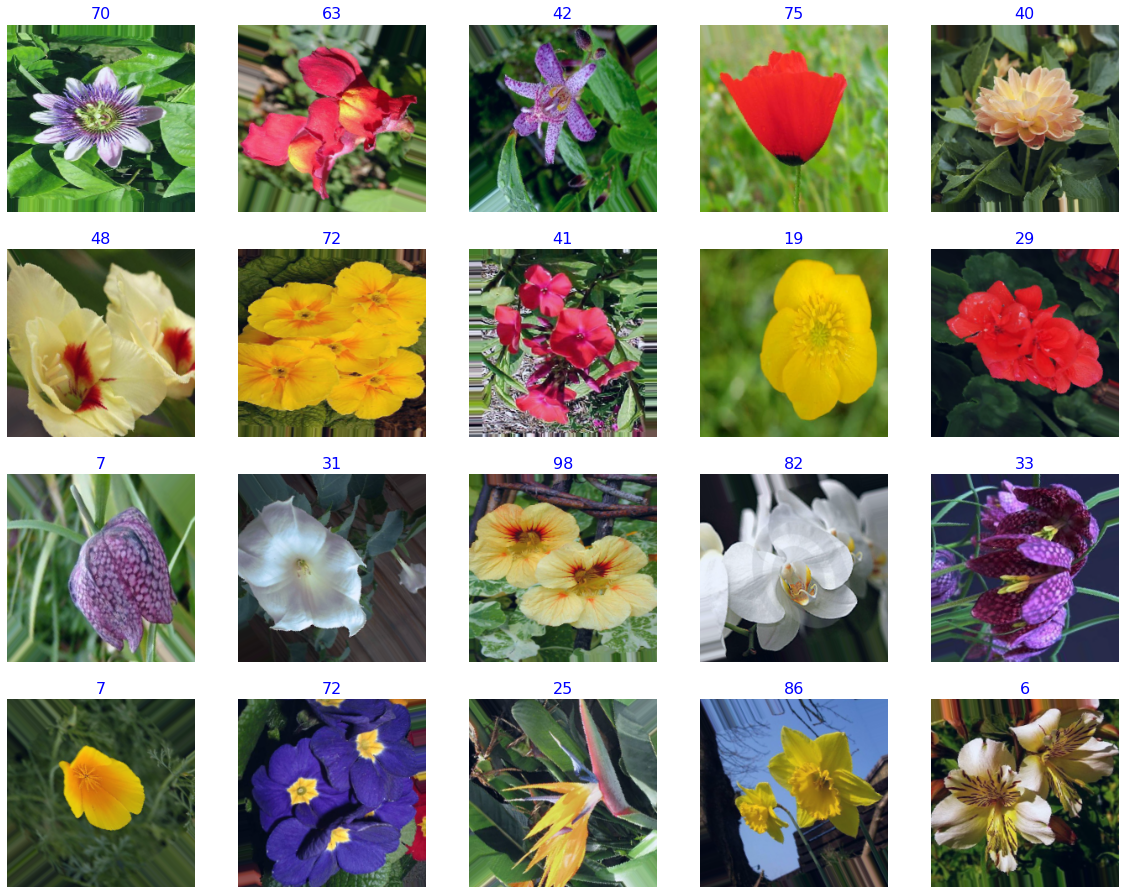

In [ ]:
show_image_samples(train_gen)

In [ ]:
from keras.models import Sequential,Model

from keras.optimizers import RMSprop,Adam
from keras.layers import MaxPooling2D,BatchNormalization,Dropout,Flatten,Dense,Conv2D,Input,GlobalAveragePooling2D
from keras import layers  
from tensorflow import keras
from keras.applications.resnet import ResNet50

# Using resnet50 model and attaching it with a dense layer with softmax for classfication.  currently freezing layers in whole resnet except last few, Also adding a global average before dense layer.

In [ ]:

from matplotlib.cbook import flatten
def build_model():
    input_shape=(224, 224, 3)
    # use imagenet - pre-trainined weights for images
    baseModel =ResNet50(weights= 'imagenet', include_top = False, input_shape=(224, 224, 3))
    for layer in baseModel.layers:
      if isinstance(layer,keras.layers.BatchNormalization):
        layer.trainable =False
        #print(layer.trainable)
        #print(layer)
      layer.trainable = False

    next(print(x.trainable_variables) for x in baseModel.layers[::-1] if isinstance(x, keras.layers.BatchNormalization))

    #inputs = keras.Input(shape=(224, 224, 3))

    headModel =baseModel.output
    
    for layer in baseModel.layers:
      if layer.name.startswith('conv5_block3'):
        layer.trainable = True
      if layer.name.startswith('post'):
        layer.trainable = True
      print(layer.trainable)
    headModel = GlobalAveragePooling2D()(headModel)
    #headModel =Flatten()(headModel)
    headModel = Dropout(0.1)(headModel)
    #headModel = Dense(1024,activation ="relu")(headModel)
    #headModel = Dropout(0.1)(headModel)

    
    
    headModel = Dense(102, activation="softmax")(headModel)
    
    x = Model(baseModel.inputs,outputs=headModel)

    optimizers = RMSprop(learning_rate=  0.1)
    x.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])

    return x

x=build_model()
x.summary()


# First only unfrozen layers are updated in training mode. High learning rate is used and only trained for few epochs to avoid overfit

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/content/drive/MyDrive/Resnet50_fix.h5'
model2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

start = datetime.now()

cnnModel=x.fit(
  train_gen,
  validation_data=valid_gen,
  steps_per_epoch=train_steps,
  workers=10,
  epochs=3,
  validation_steps=valid_steps,
  callbacks=model2_checkpoint_callback)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/3
816/816 [==============================] - ETA: 0s - loss: 6.6067 - accuracy: 0.2888
Epoch 1: val_loss improved from inf to 3.71611, saving model to /content/drive/MyDrive/Resnet50_fix.h5
816/816 [==============================] - 439s 513ms/step - loss: 6.6067 - accuracy: 0.2888 - val_loss: 3.7161 - val_accuracy: 0.2892
Epoch 2/3
816/816 [==============================] - ETA: 0s - loss: 2.5525 - accuracy: 0.4199
Epoch 2: val_loss improved from 3.71611 to 2.60675, saving model to /content/drive/MyDrive/Resnet50_fix.h5
816/816 [==============================] - 377s 458ms/step - loss: 2.5525 - accuracy: 0.4199 - val_loss: 2.6067 - val_accuracy: 0.3949
Epoch 3/3
816/816 [==============================] - ETA: 0s - loss: 2.4135 - accuracy: 0.4579
Epoch 3: val_loss did not improve from 2.60675
816/816 [==============================] - 374s 454ms/step - loss: 2.4135 - accuracy: 0.4579 - val_loss: 2.7013 - val_accuracy: 0.4458
Training completed in time:  0:20:03.370346


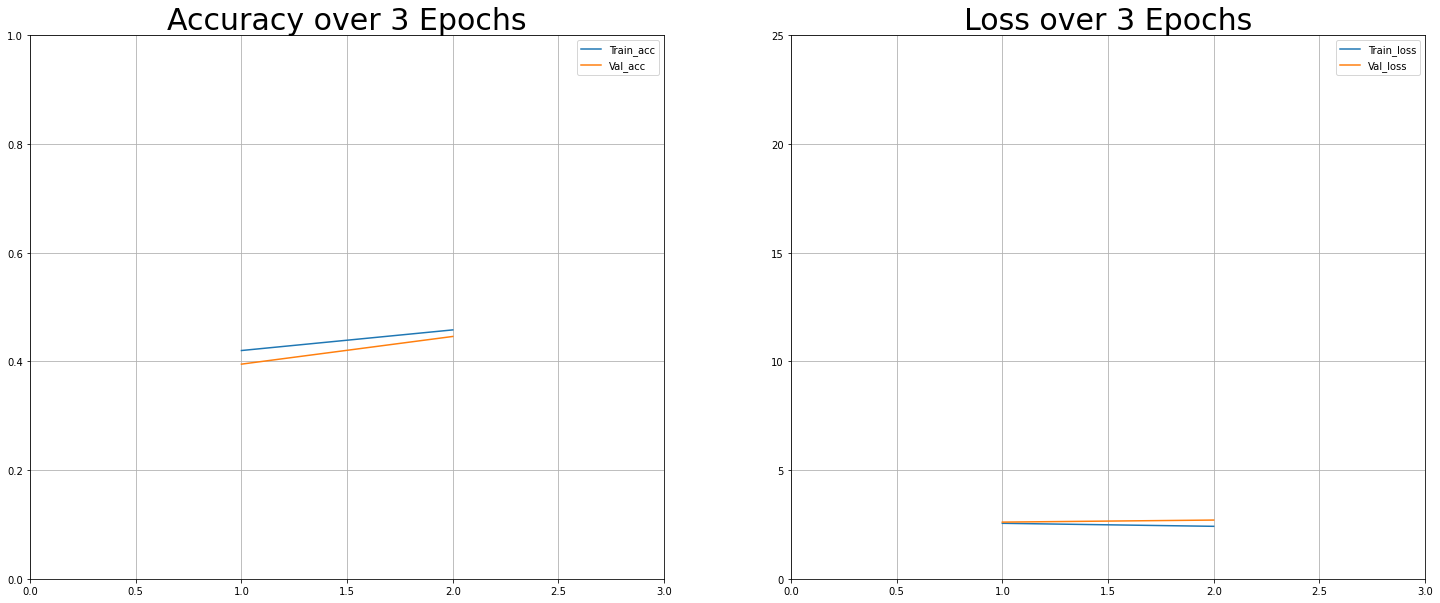

In [ ]:

from datetime import datetime
from keras.callbacks import ModelCheckpoint

def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(25, 10))
    plt.subplot(121)
    plt.xlim(0,epochs)
    plt.ylim(0, 1.0)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=30)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0,epochs)
    plt.ylim(0, 25)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=30)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(cnnModel,3)

# Now training for 15 epochs with lower learning rate and unfrozen layers except batch norm layers

In [ ]:
baseModelx = x
baseModelx.load_weights(filepath="/content/drive/MyDrive/Resnet50_fix.h5")
baseModelx.trainable = True
#unfreeze every layer except batchnorm
for layer in baseModelx.layers:
  if isinstance(layer,keras.layers.BatchNormalization):
    layer.trainable =False
    print(layer.trainable)
    print(layer)

#for finetuning we use much lower learning rate.
optimizers = RMSprop(learning_rate=  0.0001)
baseModelx.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
baseModelx.summary()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                       

In [ ]:


checkpoint_filepath = '/content/drive/MyDrive/resetfinenetune.h5'
model2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

start = datetime.now()

cnnModel2=baseModelx.fit(
  train_gen,
  validation_data=valid_gen,
  steps_per_epoch=train_steps,
  epochs=15,
  validation_steps=valid_steps,
  callbacks=model2_checkpoint_callback)

Epoch 1/15
816/816 [==============================] - ETA: 0s - loss: 3.5465 - accuracy: 0.2069
Epoch 1: val_loss improved from inf to 2.67464, saving model to /content/drive/MyDrive/resetfinenetune.h5
816/816 [==============================] - 560s 677ms/step - loss: 3.5465 - accuracy: 0.2069 - val_loss: 2.6746 - val_accuracy: 0.2791
Epoch 2/15
816/816 [==============================] - ETA: 0s - loss: 2.6374 - accuracy: 0.2915
Epoch 2: val_loss improved from 2.67464 to 2.59766, saving model to /content/drive/MyDrive/resetfinenetune.h5
816/816 [==============================] - 536s 656ms/step - loss: 2.6374 - accuracy: 0.2915 - val_loss: 2.5977 - val_accuracy: 0.2718
Epoch 3/15
816/816 [==============================] - ETA: 0s - loss: 2.3216 - accuracy: 0.3383
Epoch 3: val_loss improved from 2.59766 to 2.15308, saving model to /content/drive/MyDrive/resetfinenetune.h5
816/816 [==============================] - 532s 652ms/step - loss: 2.3216 - accuracy: 0.3383 - val_loss: 2.1531 - va

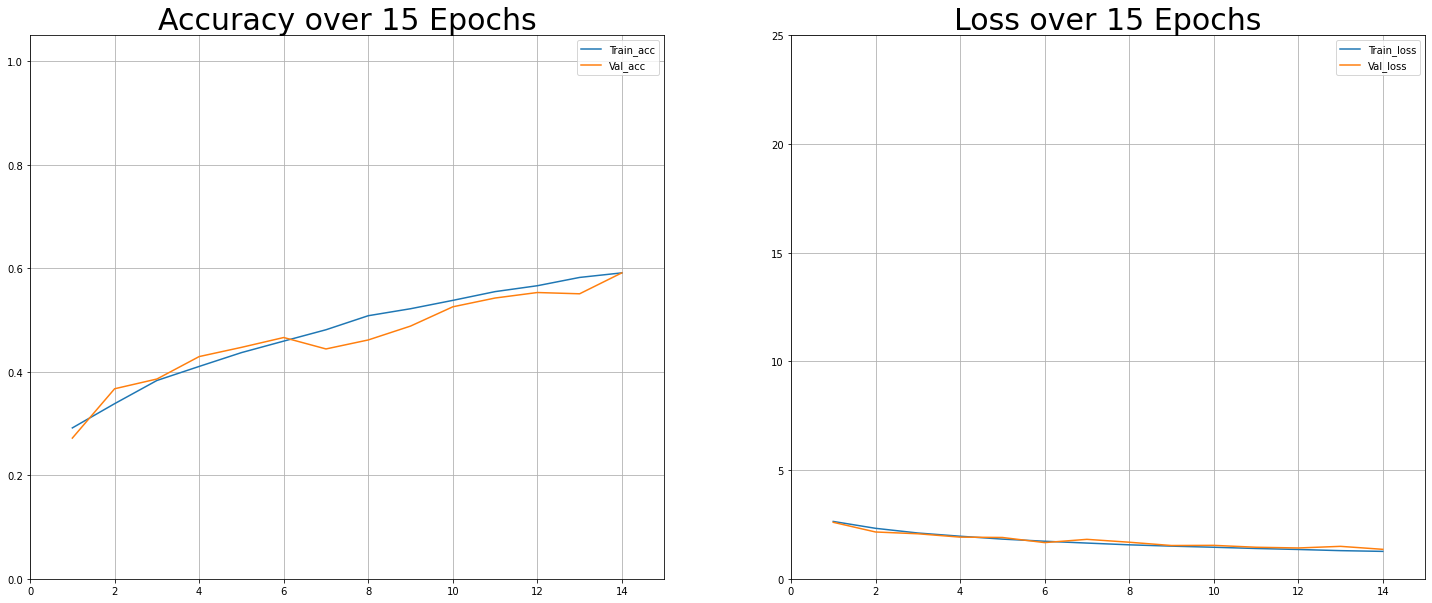

In [ ]:
from tensorflow.keras.models import load_model
from datetime import datetime
from keras.callbacks import ModelCheckpoint


def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(25, 10))
    plt.subplot(121)
    plt.xlim(0,epochs)
    plt.ylim(0, 1.05)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=30)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0,epochs)
    plt.ylim(0, 25)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=30)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(cnnModel2,15)

In [ ]:

df_result=pd.DataFrame(cnnModel2.history)

In [ ]:
data=df_result.to_excel('/content/drive/MyDrive/xceptionafterFinet.xlsx')


In [ ]:
m=baseModelx

In [ ]:
m.load_weights('/content/drive/MyDrive/resetfinenetune.h5')

In [ ]:
acc=m.evaluate(test_gen,batch_size=30, verbose=1)[1]*100
msg='Model accuracy on test set: ' + str(acc)
print(msg)

41/41 [==============================] - 29s 709ms/step - loss: 1.3881 - accuracy: 0.5980
Model accuracy on test set: 59.80392098426819


In [ ]:
save_dir='/content/drive/MyDrive/flowers/balanced_set'
subject='flowers_FTXception'
model_name='FinetunedXception'
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
m.save(save_loc)

In [ ]:
def print_info( test_gen, preds, print_code, save_dir, subject ):

    class_dict=dict(enumerate(lists.flatten(), 1))
    #labels= test_gen.labels
    labels=np.argmax(test_gen.labels, axis=1)
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list((new_dict.values()))
    ss=[] 
    for i in range(len(classes)):
      ss.append(str(classes[i]))
    classes=ss   # list of string of class names
    dict_as_text=str(new_dict)
    dict_name= subject + '-' +str(len(classes)) +'.txt'  
    dict_path=os.path.join(save_dir,dict_name)    
    with open(dict_path, 'w') as x_file:
        x_file.write(dict_as_text)    
    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)
        #print(type(pred_index))        
        true_index=labels[i]
        #print(true_index.nonzero())
        #true_index=(''.join(map(str, true_index.nonzero())))


        
        #print(type(true_index))
        #xxx=re.findall('\d',true_index)
        #true_index=magic(xxx)
        #print(xxx)
        if (pred_index != true_index): # a misclassification has occurred
            error_list.append(file_names[i])
            #print(type(true_index))
            #print(true_index)
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(error_list[i], pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    print(len(classes))
    if len(classes)<=500:
        # create a confusion matrix and a test report        
        y_true= np.array(labels)        
        y_pred=np.array(y_pred)        
        cm = confusion_matrix(y_true, y_pred )
        clr = classification_report(y_true, y_pred, target_names=classes)
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted \nAccuracy = " + str(round(acc,2))+'%')
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        #plt.xlabel('\nAccuracy = 97.54%',fontsize=20)
        plt.show()    
        print("Classification Report:\n----------------------\n", clr)

# Prediction on test dataset

In [ ]:
pred2=m.predict(test_gen)

41/41 [==============================] - 23s 533ms/step


102


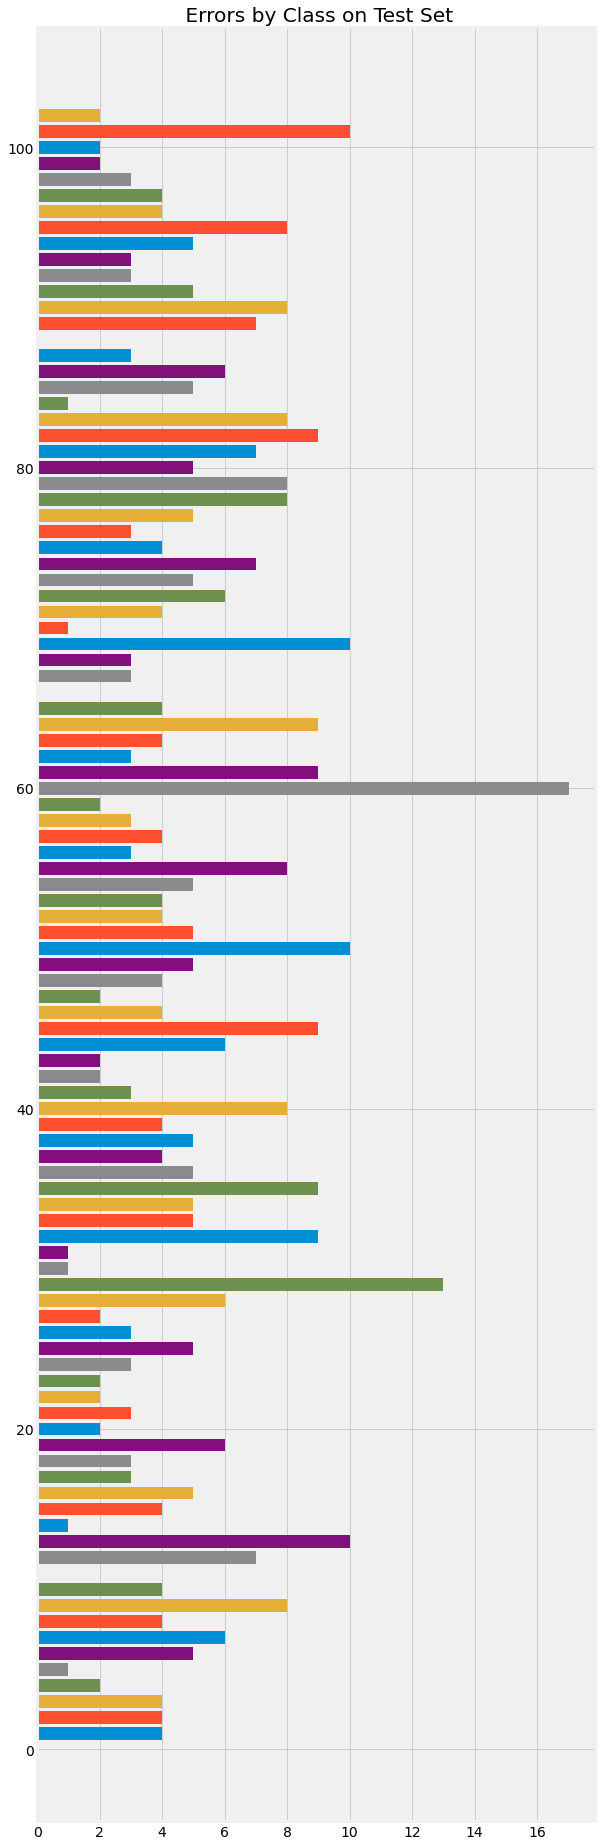

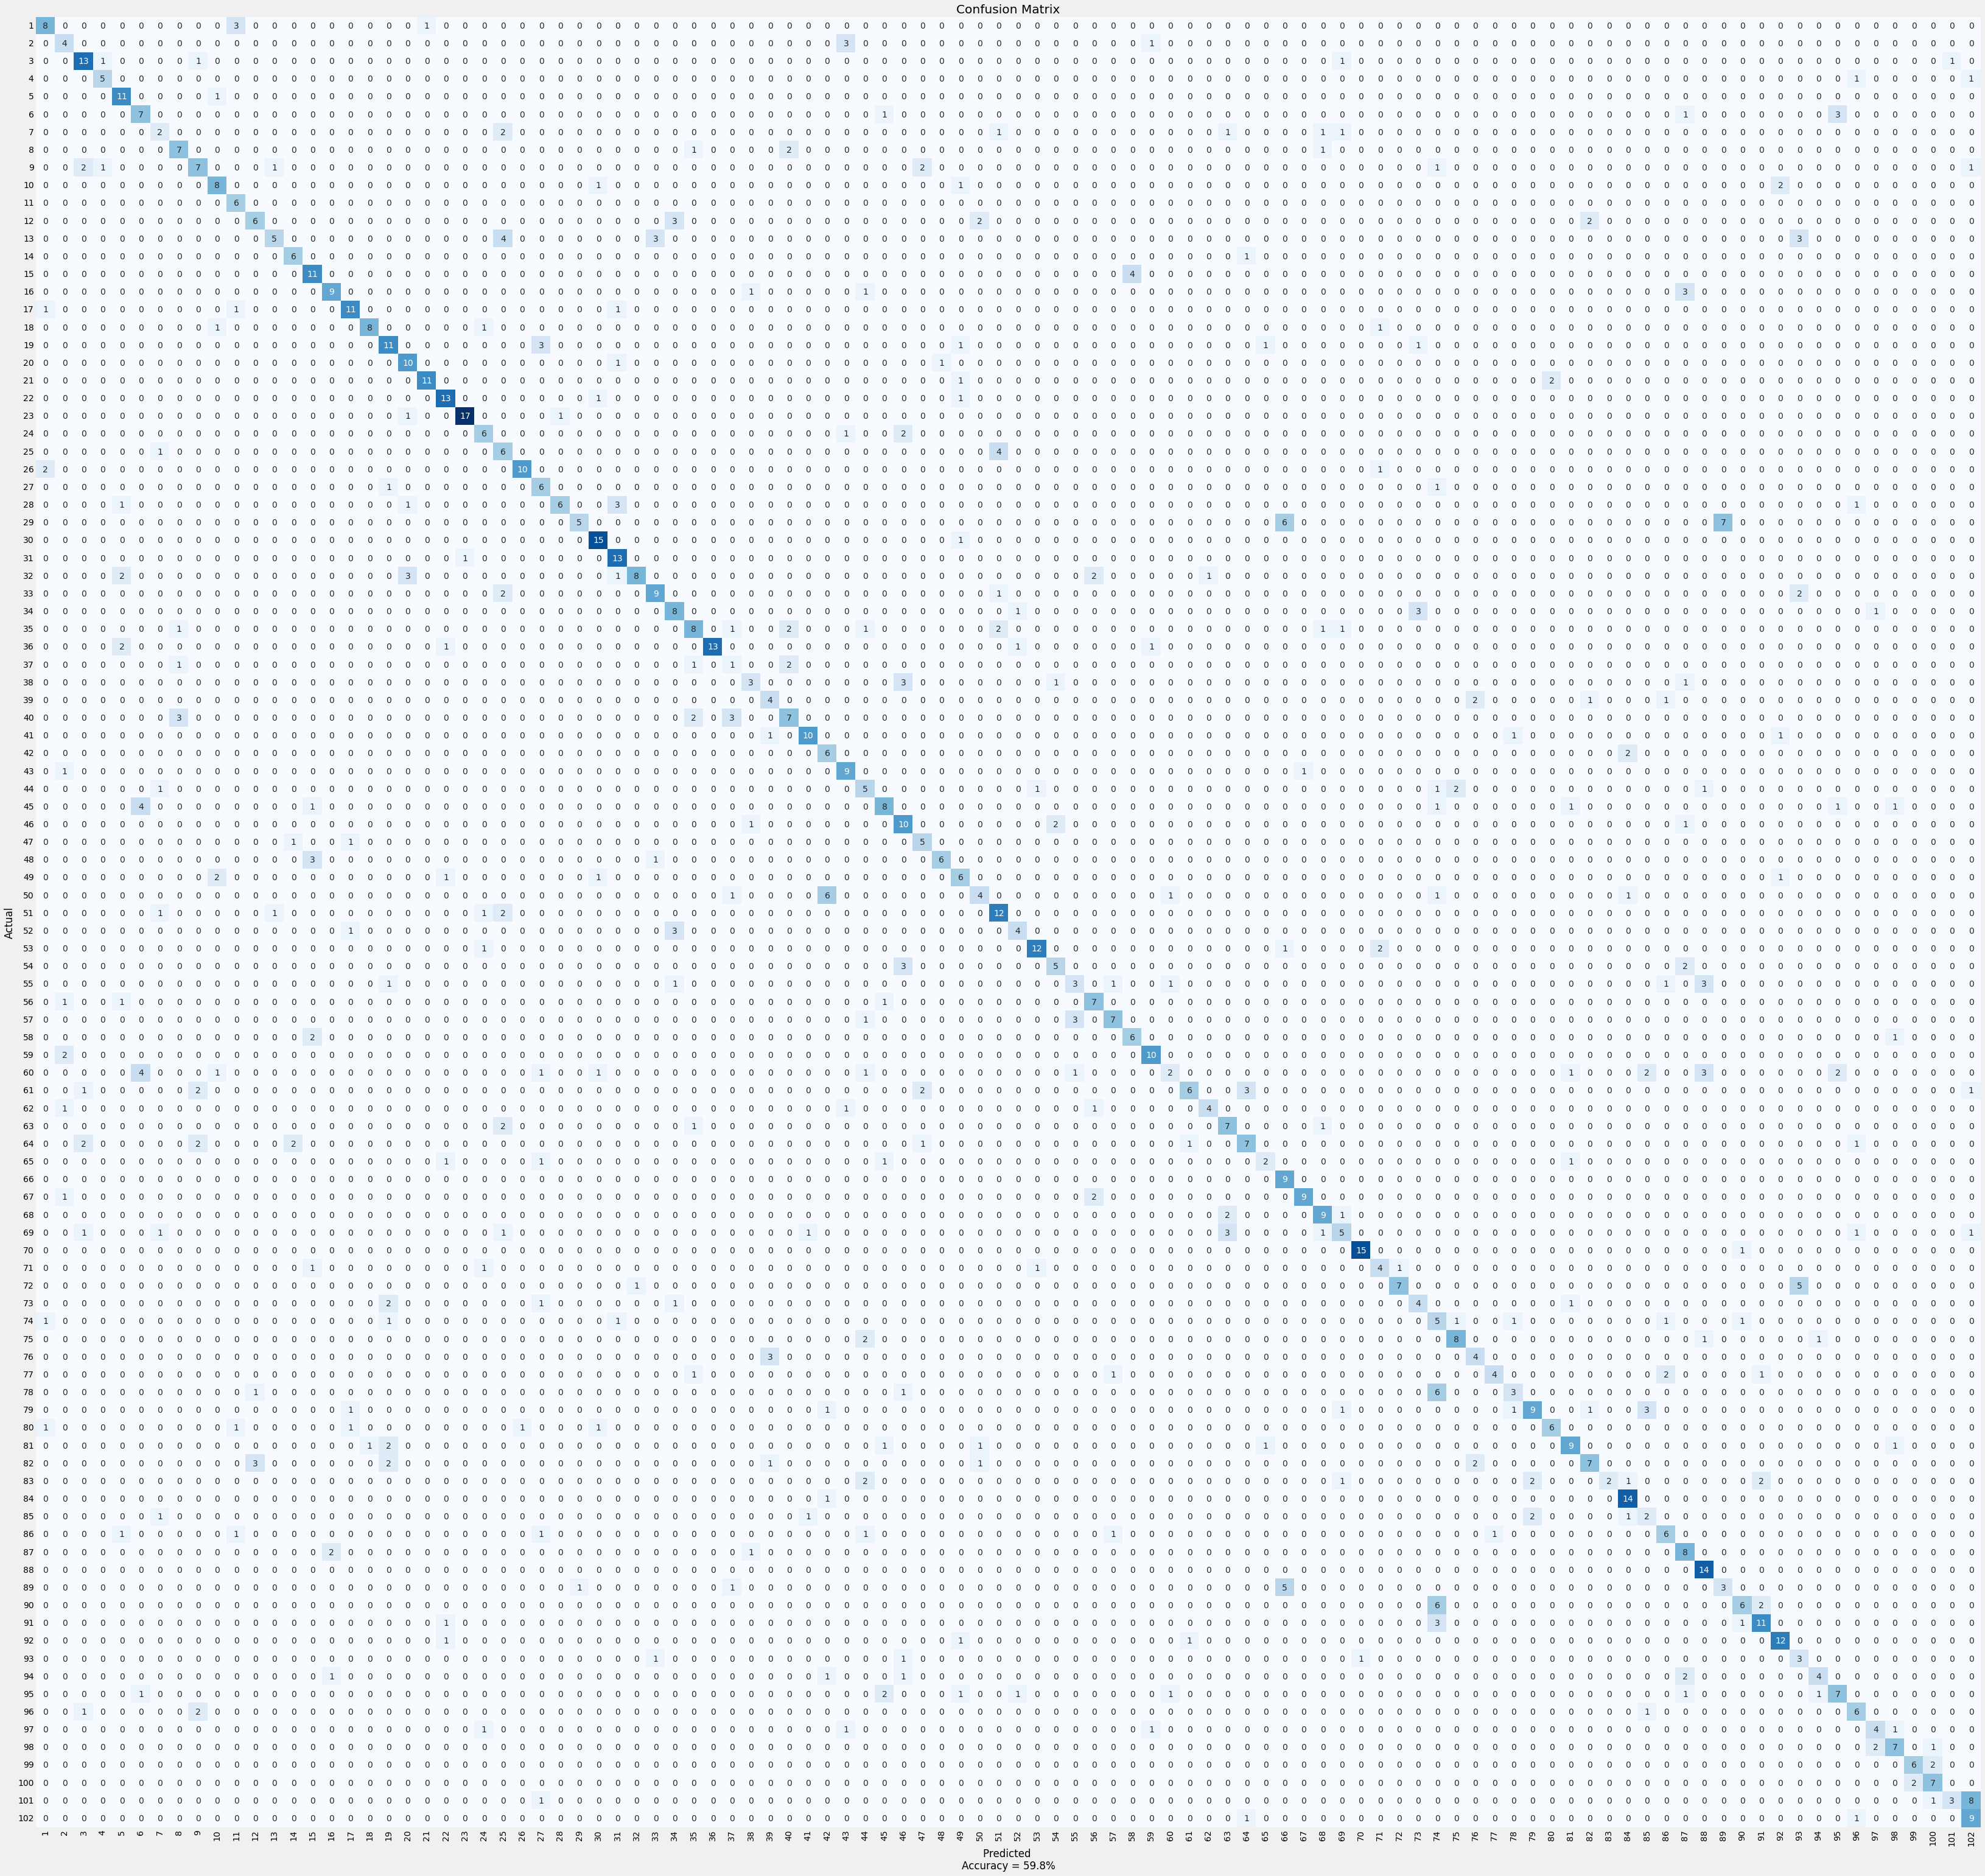

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.62      0.67      0.64        12
           2       0.40      0.50      0.44         8
           3       0.65      0.76      0.70        17
           4       0.71      0.71      0.71         7
           5       0.61      0.92      0.73        12
           6       0.44      0.58      0.50        12
           7       0.29      0.25      0.27         8
           8       0.58      0.64      0.61        11
           9       0.50      0.47      0.48        15
          10       0.62      0.67      0.64        12
          11       0.50      1.00      0.67         6
          12       0.60      0.46      0.52        13
          13       0.71      0.33      0.45        15
          14       0.67      0.86      0.75         7
          15       0.61      0.73      0.67        15
          16       0.75      0.64      0.69        14
          17       0.73      0.79 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print_code=0
#pred1=cnnModel.predict(valid_gen) 
#print_info( valid_gen, pred1, print_code, save_dir, subject )  

print_info(test_gen, pred2, print_code, save_dir, subject )

# Lets train with even less learning rate and see what accuracy we achieve

In [ ]:
baseModelx = m
baseModelx.load_weights(filepath="/content/drive/MyDrive/resetfinenetune.h5")
baseModelx.trainable = True
#unfreeze every layer except batchnorm
for layer in baseModelx.layers:
  if isinstance(layer,keras.layers.BatchNormalization):
    layer.trainable =False
    print(layer.trainable)
    print(layer)

#for finetuning we use much lower learning rate.
optimizers = RMSprop(learning_rate=  0.00001)
baseModelx.compile(loss = 'categorical_crossentropy', optimizer = optimizers, metrics = ['accuracy'])
baseModelx.summary()

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                       

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/resetfinenetuneMore.h5'
model2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

start = datetime.now()

cnnModel2=baseModelx.fit(
  train_gen,
  validation_data=valid_gen,
  steps_per_epoch=train_steps,
  workers=2,
  epochs=8,
  validation_steps=valid_steps,
  callbacks=model2_checkpoint_callback)

Epoch 1/8
816/816 [==============================] - ETA: 0s - loss: 0.7444 - accuracy: 0.7475
Epoch 1: val_loss improved from inf to 0.86865, saving model to /content/drive/MyDrive/resetfinenetuneMore.h5
816/816 [==============================] - 435s 523ms/step - loss: 0.7444 - accuracy: 0.7475 - val_loss: 0.8686 - val_accuracy: 0.7115
Epoch 2/8
816/816 [==============================] - ETA: 0s - loss: 0.6435 - accuracy: 0.7770
Epoch 2: val_loss improved from 0.86865 to 0.83085, saving model to /content/drive/MyDrive/resetfinenetuneMore.h5
816/816 [==============================] - 427s 523ms/step - loss: 0.6435 - accuracy: 0.7770 - val_loss: 0.8309 - val_accuracy: 0.7344
Epoch 3/8
816/816 [==============================] - ETA: 0s - loss: 0.5983 - accuracy: 0.7946
Epoch 3: val_loss improved from 0.83085 to 0.79298, saving model to /content/drive/MyDrive/resetfinenetuneMore.h5
816/816 [==============================] - 425s 520ms/step - loss: 0.5983 - accuracy: 0.7946 - val_loss: 0.

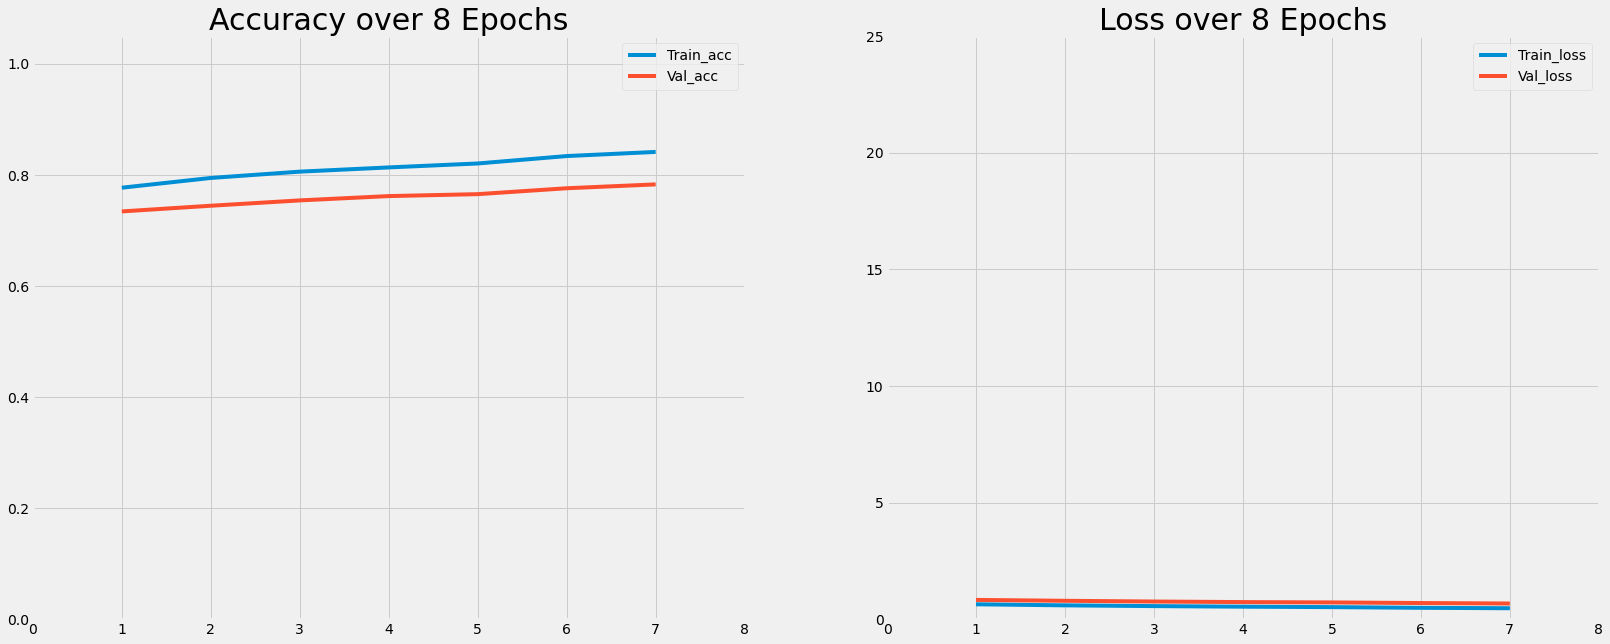

In [ ]:
def plot_acc_loss(result, epochs):
    acc = result.history['accuracy']
    loss = result.history['loss']
    val_acc = result.history['val_accuracy']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(25, 10))
    plt.subplot(121)
    plt.xlim(0,epochs)
    plt.ylim(0, 1.05)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=30)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.xlim(0,epochs)
    plt.ylim(0, 25)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=30)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(cnnModel2,8)

In [ ]:
df_result=pd.DataFrame(cnnModel2.history)

In [ ]:
data=df_result.to_excel('/content/drive/MyDrive/xceptionafterFinetunemore.xlsx')

In [ ]:
m=baseModelx


In [ ]:
m.load_weights('/content/drive/MyDrive/resetfinenetuneMore.h5')

In [ ]:
acc=m.evaluate(test_gen,batch_size=30, verbose=1)[1]*100
msg='Model accuracy on test set: ' + str(acc)
print(msg)

41/41 [==============================] - 20s 474ms/step - loss: 0.6157 - accuracy: 0.8137
Model accuracy on test set: 81.3725471496582


In [ ]:
save_dir='/content/drive/MyDrive/flowers/balanced_set'
subject='flowers_FTXceptionft'
model_name='FinetunedXceptionexta'
save_id=str (model_name +  '-' + subject +'-'+ str(acc)[:str(acc).rfind('.')+3] + '.h5')
save_loc=os.path.join(save_dir, save_id)
m.save(save_loc)

In [ ]:
pred2=m.predict(test_gen)

41/41 [==============================] - 21s 483ms/step


102


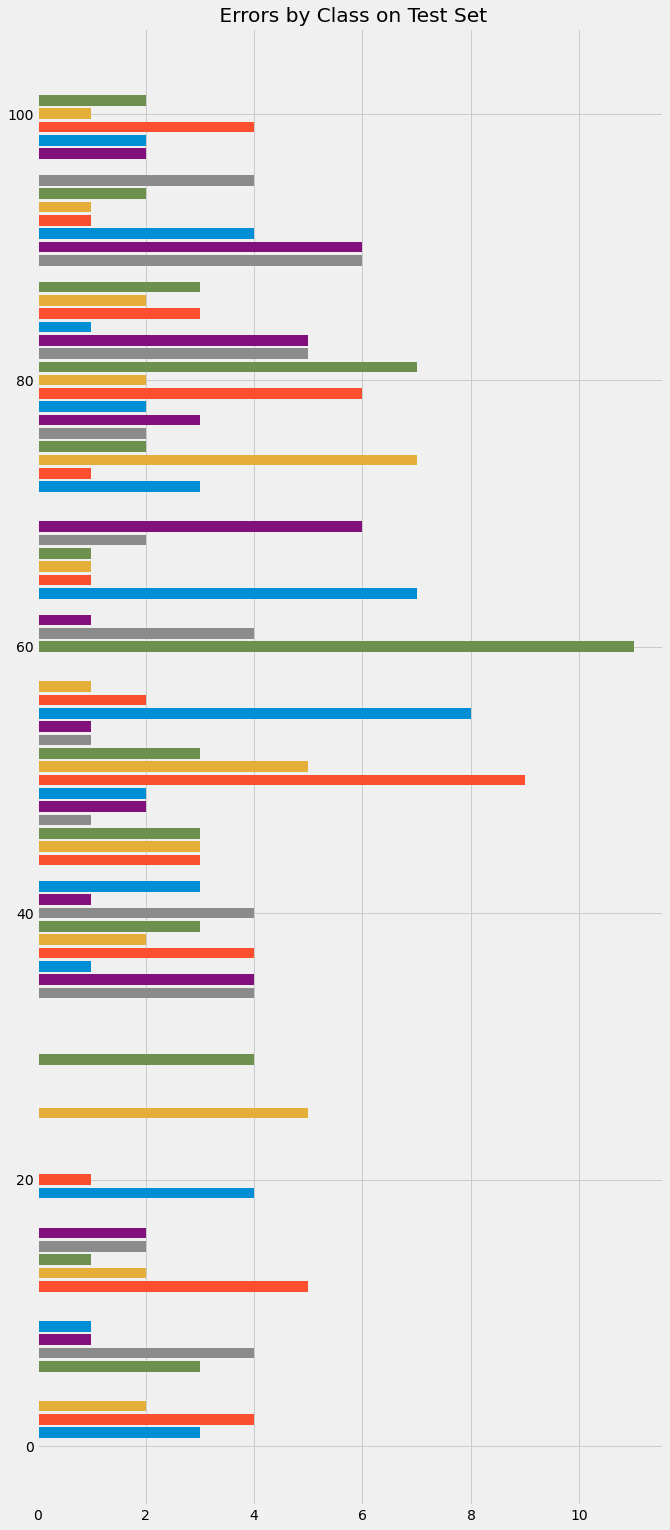

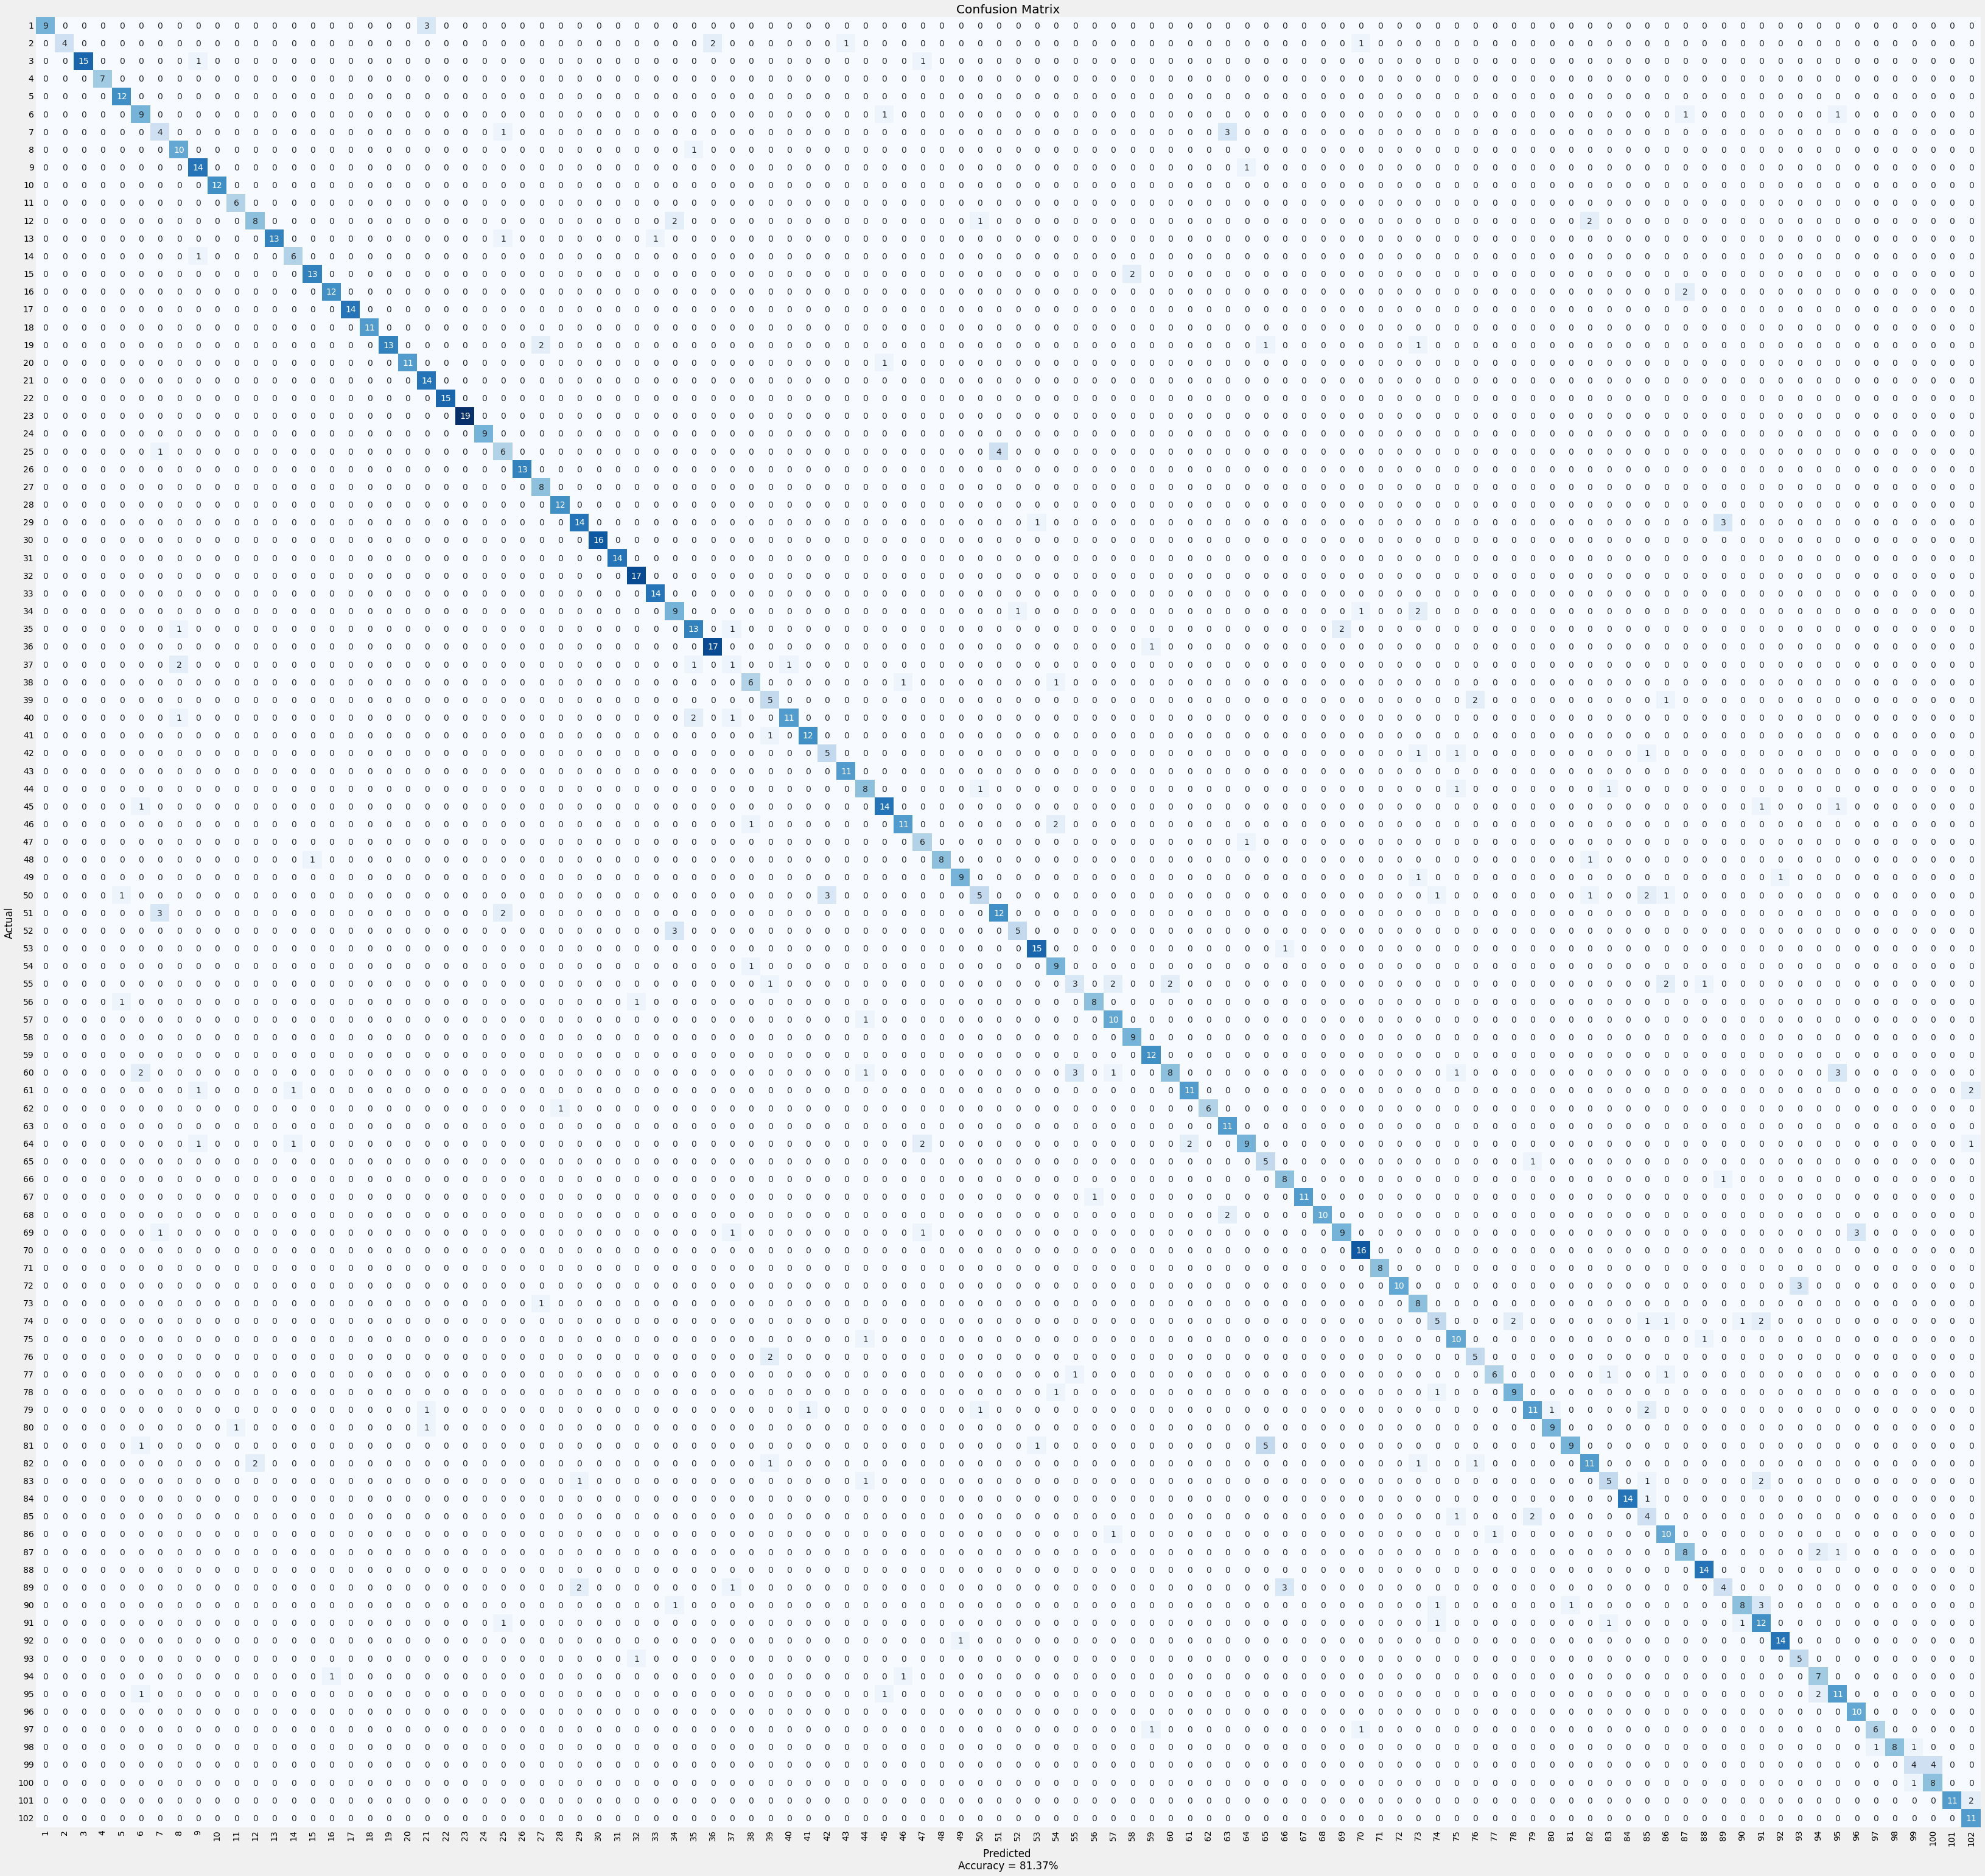

Classification Report:
----------------------
               precision    recall  f1-score   support

           1       1.00      0.75      0.86        12
           2       1.00      0.50      0.67         8
           3       1.00      0.88      0.94        17
           4       1.00      1.00      1.00         7
           5       0.86      1.00      0.92        12
           6       0.64      0.75      0.69        12
           7       0.44      0.50      0.47         8
           8       0.71      0.91      0.80        11
           9       0.78      0.93      0.85        15
          10       1.00      1.00      1.00        12
          11       0.86      1.00      0.92         6
          12       0.80      0.62      0.70        13
          13       1.00      0.87      0.93        15
          14       0.75      0.86      0.80         7
          15       0.93      0.87      0.90        15
          16       0.92      0.86      0.89        14
          17       1.00      1.00 

In [ ]:
print_code=0
print_info(test_gen, pred2, print_code, save_dir, subject )